<a href="https://colab.research.google.com/github/alinapradhan/Next-Earthquake-Prediction-/blob/main/Next_Earthquake_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error
import joblib

In [3]:
# Load the uploaded dataset
df = pd.read_csv("Indian_earthquake_data.csv")


In [4]:
df.head()

,Origin Time,Latitude,Longitude,Depth,Magnitude,Location
0,2021-07-31 09:43:23 IST,29.06,77.42,5.0,2.5,"53km NNE of New Delhi, India"
1,2021-07-30 23:04:57 IST,19.93,72.92,5.0,2.4,"91km W of Nashik, Maharashtra, India"
2,2021-07-30 21:31:10 IST,31.50,74.37,33.0,3.4,"49km WSW of Amritsar, Punjab, India"
3,2021-07-30 13:56:31 IST,28.34,76.23,5.0,3.1,"50km SW of Jhajjar, Haryana"
4,2021-07-30 07:19:38 IST,27.09,89.97,10.0,2.1,"53km SE of Thimphu, Bhutan"


In [5]:
# Preprocessing
df['Origin Time'] = pd.to_datetime(df['Origin Time'], errors='coerce')
df = df.dropna(subset=['Origin Time'])


/tmp/ipython-input-5-4085119456.py:2: FutureWarning: Parsed string "2021-07-31 09:43:23 IST" included an un-recognized timezone "IST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['Origin Time'] = pd.to_datetime(df['Origin Time'], errors='coerce')


In [6]:
# Feature extraction
df['Year'] = df['Origin Time'].dt.year
df['Month'] = df['Origin Time'].dt.month
df['Day'] = df['Origin Time'].dt.day
df['Hour'] = df['Origin Time'].dt.hour
df['Minute'] = df['Origin Time'].dt.minute
df['Second'] = df['Origin Time'].dt.second

In [7]:
features = ['Latitude', 'Longitude', 'Depth', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']

In [8]:
# 1. Magnitude Prediction
X = df[features]
y = df['Magnitude']
X_train, X_test = X.iloc[:int(0.8*len(X))], X.iloc[int(0.8*len(X)):]
y_train, y_test = y.iloc[:int(0.8*len(y))], y.iloc[int(0.8*len(y)):]

mag_model = RandomForestRegressor(n_estimators=100, random_state=42)
mag_model.fit(X_train, y_train)
y_pred = mag_model.predict(X_test)


In [9]:
mag_model = RandomForestRegressor(n_estimators=100, random_state=42)
mag_model.fit(X_train, y_train)
y_pred = mag_model.predict(X_test)


In [10]:
print(" Magnitude MAE:", mean_absolute_error(y_test, y_pred))

 Magnitude MAE: 0.4615073529411764


In [11]:
# Save predictions
pd.DataFrame({
    "Actual Magnitude": y_test.values,
    "Predicted Magnitude": y_pred
}).to_csv("earthquake_predictions.csv", index=False)


In [12]:
#  2. Time-to-Next Prediction
df_sorted = df.sort_values('Origin Time').reset_index(drop=True)
df_sorted['Time_Delta_Minutes'] = df_sorted['Origin Time'].shift(-1) - df_sorted['Origin Time']
df_sorted['Time_Delta_Minutes'] = df_sorted['Time_Delta_Minutes'].dt.total_seconds() / 60.0
df_sorted = df_sorted.dropna(subset=['Time_Delta_Minutes'])

In [13]:
X_time = df_sorted[features]
y_time = df_sorted['Time_Delta_Minutes']
X_time_train, X_time_test = X_time.iloc[:int(0.8*len(X_time))], X_time.iloc[int(0.8*len(X_time)):]
y_time_train, y_time_test = y_time.iloc[:int(0.8*len(y_time))], y_time.iloc[int(0.8*len(y_time)):]


In [14]:
time_model = RandomForestRegressor(n_estimators=100, random_state=42)
time_model.fit(X_time_train, y_time_train)
y_time_pred = time_model.predict(X_time_test)


In [15]:
print(" Time Delta MAE (min):", mean_absolute_error(y_time_test, y_time_pred))


 Time Delta MAE (min): 336.4973799274918


In [16]:
pd.DataFrame({
    "Actual Time Delta (min)": y_time_test.values,
    "Predicted Time Delta (min)": y_time_pred
}).to_csv("earthquake_time_predictions.csv", index=False)

In [17]:
# ----------- 3. Location Prediction -----------
y_loc = df[['Latitude', 'Longitude']]
X_loc = df[features]
X_loc_train, X_loc_test = X_loc.iloc[:int(0.8*len(X_loc))], X_loc.iloc[int(0.8*len(X_loc)):]
y_loc_train, y_loc_test = y_loc.iloc[:int(0.8*len(y_loc))], y_loc.iloc[int(0.8*len(y_loc)):]


In [18]:
loc_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
loc_model.fit(X_loc_train, y_loc_train)
y_loc_pred = loc_model.predict(X_loc_test)


In [19]:

print(" Location prediction done.")

 Location prediction done.


In [20]:

pd.DataFrame({
    "Actual Latitude": y_loc_test['Latitude'].values,
    "Predicted Latitude": y_loc_pred[:, 0],
    "Actual Longitude": y_loc_test['Longitude'].values,
    "Predicted Longitude": y_loc_pred[:, 1],
}).to_csv("earthquake_location_predictions.csv", index=False)

In [27]:
from google.colab import files
files.download('earthquake_predictions.csv')
files.download('earthquake_time_predictions.csv')
files.download('earthquake_location_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
joblib.dump(mag_model, 'magnitude_model.pkl')
files.download('magnitude_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

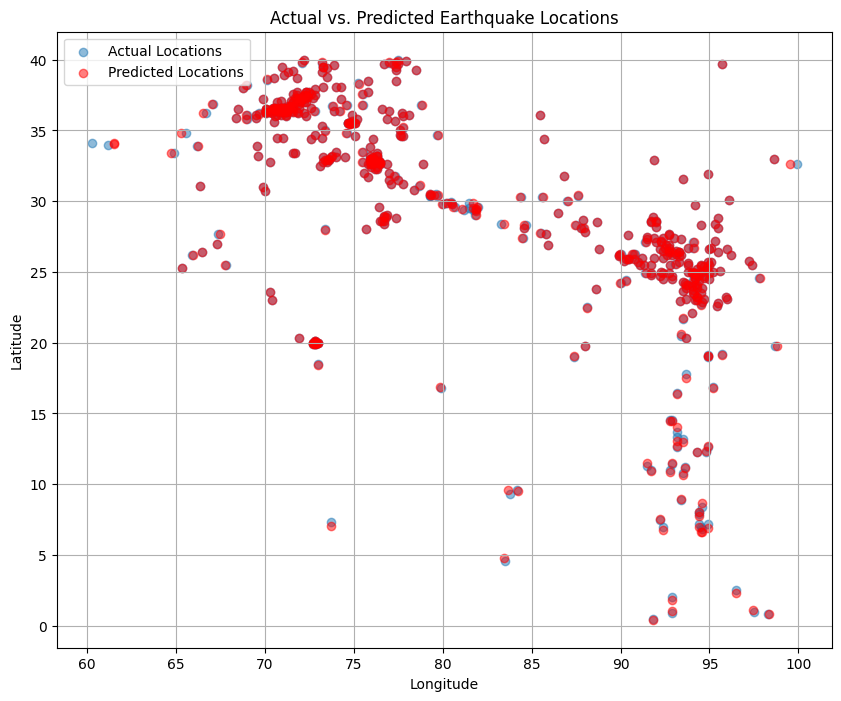

In [26]:
import matplotlib.pyplot as plt
# Plot predicted vs actual locations
plt.figure(figsize=(10, 8))
plt.scatter(y_loc_test['Longitude'], y_loc_test['Latitude'], alpha=0.5, label='Actual Locations')
plt.scatter(y_loc_pred[:, 1], y_loc_pred[:, 0], alpha=0.5, label='Predicted Locations', color='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Actual vs. Predicted Earthquake Locations')
plt.legend()
plt.grid(True)
plt.show()